In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [2]:
import pandas as pd

mushrooms = pd.read_csv(path_data+'mushrooms.csv')
mushrooms.head()

,index,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,1,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,2,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,3,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,4,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g


<Axes: xlabel='class'>

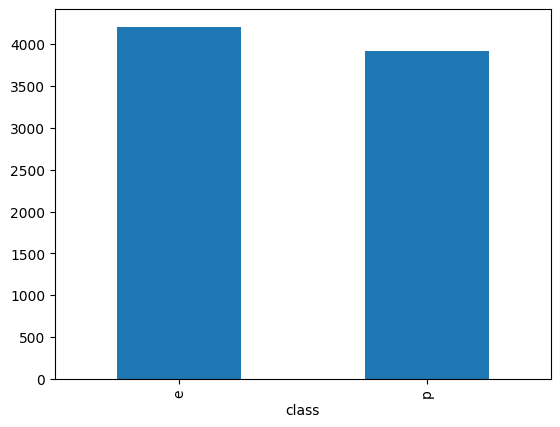

"\nThat's right! There are only two classes in the categorical target. Besides, the distribution is close to uniform.\n"

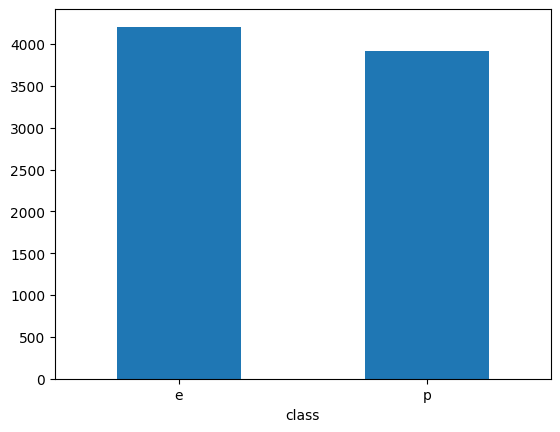

In [8]:
# exercise 01

"""
Exploring the mushroom dataset

In this chapter you'll work with a new dataset about North American mushrooms! Each mushroom is represented with physical features and classified as edible, poisonous, or unknown and not recommended. However, the unknown class was combined with the poisonous one. The objective is to predict which mushrooms are edible based on their properties.

The dataset is available to you as mushrooms, and the target is the 'class' column. Explore it in the IPython Shell and select the correct statement from the options below.
"""

# Instructions

"""
Possible answers:
    
    There are three classes: 'e' (edible), 'p' (poisonous), and 'u' (unknown).
    
    There are some values missing from the poisonous class.
    
    The target is binary, categorical, and balanced. {Answer}
"""

# solution
import matplotlib.pyplot as plt
mushrooms['class'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show

#----------------------------------#

# Conclusion

"""
That's right! There are only two classes in the categorical target. Besides, the distribution is close to uniform.
"""

In [1]:
# exercise 02

"""
Predicting mushroom edibility

Now that you have explored the data, it's time to build a first model to predict mushroom edibility.

The dataset is available to you as mushrooms. As both the features and the target are categorical, these have been transformed into "dummy" binary variables for you.

Let's begin with Naive Bayes (using scikit-learn's GaussianNB) and see how this algorithm performs on this problem.
"""

# Instructions

"""

    
    Instantiate a GaussianNB classifier called clf_nb.
    
    Fit clf_nb to the training data X_train and y_train.
    
    Evaluate the performance on the test set using the accuracy score.

"""

# solution

# Instantiate a Naive Bayes classifier
clf_nb = GaussianNB()

# Fit the model to the training set
clf_nb.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = clf_nb.predict(X_test)

# Evaluate the performance using the accuracy score
print("Accuracy: {:0.4f}".format(accuracy_score(y_test, pred)))

#----------------------------------#

# Conclusion

"""
Not bad - this initial model has an accuracy around 97%!
"""

'\n\n'

In [2]:
# exercise 03

"""
K-nearest neighbors for mushrooms

The Gaussian Naive Bayes classifier did a really good job for being an initial model. Let's now build a new model to compare it against the Naive Bayes.

In this case, the algorithm to use is a 5-nearest neighbors classifier. As the dummy features create a high-dimensional dataset, use the Ball Tree algorithm to make the model faster. Let's see how this model performs!
"""

# Instructions

"""

    Build a KNeighborsClassifier with 5 neighbors and algorithm = 'ball_tree' (to expedite the processing).
    Fit the model to the training data.
    Evaluate the performance on the test set using the accuracy score.


"""

# solution

# Instantiate a 5-nearest neighbors classifier with 'ball_tree' algorithm
clf_knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'ball_tree')

# Fit the model to the training set
clf_knn.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = clf_knn.predict(X_test)

# Evaluate the performance using the accuracy score
print("Accuracy: {:0.4f}".format(accuracy_score(y_test, pred)))

#----------------------------------#

# Conclusion

"""
Brilliant! A more advanced model was able to improve the performance even further!
"""

'\n\n'

In [3]:
# exercise 04

"""
Applying stacking to predict app ratings

In this exercise you'll start building your first Stacking ensemble. The dataset you'll use is the first one we used in Chapter 1. If you recall, the objective is to predict the rating of each app (from 1 to 5). The input features we use are: Reviews, Size, Installs, Type, Price, and Content Rating.

We already did step 1: prepare the dataset. It is available to you as apps. We cleaned the required features and replaced missing values with zeros.

Now, you'll work on step 2: build the first-layer estimators.
"""

# Instructions

"""

    
    Build and fit a decision tree classifier with: min_samples_leaf: 3 and min_samples_split: 9.
    
    Build and fit a 5-nearest neighbors classifier using: algorithm: 'ball_tree' (to expedite the processing).
    
    Evaluate the performance of each estimator using the accuracy score on the test set.

"""

# solution

# Build and fit a Decision Tree classifier
clf_dt = DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=9, random_state=500)
clf_dt.fit(X_train, y_train)

# Build and fit a 5-nearest neighbors classifier using the 'Ball-Tree' algorithm
clf_knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
clf_knn.fit(X_train, y_train)

# Evaluate the performance using the accuracy score
print('Decision Tree: {:0.4f}'.format(accuracy_score(y_test, clf_dt.predict(X_test))))
print('5-Nearest Neighbors: {:0.4f}'.format(accuracy_score(y_test, clf_knn.predict(X_test))))

#----------------------------------#

# Conclusion

"""
Good job building the first-layer estimators! It looks like the decision tree is the best individual estimator with ~59% accuracy.
"""

'\n\n'

In [4]:
# exercise 05

"""
Building the stacking classifier

Now you'll work on the next two steps.

Step 3: Append the predictions to the dataset: this is internally handled by the StackingClassifier class, but we'll do our part by preparing the list of first-level classifiers, which you built in the previous exercise. These are available as: clf_dt and clf_knn.

Step 4: Build the second-layer meta estimator: for this purpose you'll use the default LogisticRegression. This will take as input features the individual predictions from the base estimators.

With both levels of estimators ready you can build the stacking classifier.
"""

# Instructions

"""

    
    Prepare the list of tuples with the first-layer classifiers: clf_dt and clf_knn (specifying the appropriate labels and order).
    
    Instantiate the second-layer meta estimator: a LogisticRegression.
    
    Build the stacking classifier passing: the list of tuples, the meta classifier, with stack_method='predict_proba' (to use class probabilities), and passthrough = False (to only use predictions as features).

"""

# solution

# Prepare the list of tuples with the first-layer classifiers
classifiers = [
	('clf_dt',clf_dt),
    ('clf_knn',clf_knn)
]

# Instantiate the second-layer meta estimator
clf_meta = LogisticRegression()

# Build the stacking classifier
clf_stack = StackingClassifier(
   estimators=classifiers,
   final_estimator=clf_meta,
   stack_method='predict_proba',
   passthrough=False)

#----------------------------------#

# Conclusion

"""
Excellent work building your first stacked ensembled! Now you are ready to train it and use it on predictions.
"""

'\n\n'

In [5]:
# exercise 06

"""
Stacked predictions for app ratings

Once the stacking estimator is built you can fit it to the training set. Then, it will be ready for step 5: use the stacked ensemble for predictions.

The stacking classifier is available to you as clf_stack.

Let's obtain the final predictions and see if there is any improvement in performance thanks to stacking.
"""

# Instructions

"""

    Fit the stacking classifier on the training set.
    Calculate the final predictions from the stacking estimator on the test set.
    Evaluate the performance on the test set using the accuracy score.

"""

# solution

# Fit the stacking classifier to the training set
clf_stack.fit(X_train, y_train)

# Obtain the final predictions from the stacking classifier
pred_stack = clf_stack.predict(X_test)

# Evaluate the new performance on the test set
print('Accuracy: {:0.4f}'.format(accuracy_score(y_test, pred_stack)))

#----------------------------------#

# Conclusion

"""
Congratulations! You finished building your first stacked ensemble using scikit-learn. In addition, the performance improved to around 64% accuracy!
"""

'\n\n'

In [6]:
# exercise 07

"""
A first attempt with mlxtend

It's time to start working with mlxtend! You'll continue using the app ratings dataset. As you have already built a stacked ensemble model using scikit-learn, you have a basis to compare with the model you'll now build with mlxtend.

The dataset is loaded and available to you as apps.

Let's see if mlxtend can build a model as good as or better than the scikit-learn ensemble classifier.
"""

# Instructions

"""

    Instantiate a decision tree classifier with min_samples_leaf = 3 and min_samples_split = 9.
    Instantiate a 5-nearest neighbors classifier using the 'ball_tree' algorithm.
    Build a StackingClassifier passing: the list of classifiers, the meta classifier, use_probas=True (to use probabilities), and use_features_in_secondary = False (to only use the individual predictions).
    Evaluate the performance by computing the accuracy score.


"""

# solution

# Instantiate the first-layer classifiers
clf_dt = DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=9, random_state=500)
clf_knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')

# Instantiate the second-layer meta classifier
clf_meta = LogisticRegression()

# Build the Stacking classifier
clf_stack = StackingClassifier(classifiers=[clf_dt, clf_knn], meta_classifier=clf_meta, use_probas=True, use_features_in_secondary=False)
clf_stack.fit(X_train, y_train)

# Evaluate the performance of the Stacking classifier
pred_stack = clf_stack.predict(X_test)
print("Accuracy: {:0.4f}".format(accuracy_score(y_test, pred_stack)))

#----------------------------------#

# Conclusion

"""
Well done building your first model with mlxtend! It was able to achieve a similar accuracy higher than 60%.
"""

'\n\n'

In [7]:
# exercise 08

"""
Back to regression with stacking

In Chapter 1, we treated the app ratings as a regression problem, predicting the rating on the interval from 1 to 5. So far in this chapter, we have dealt with it as a classification problem, rounding the rating to the nearest integer. To practice using the StackingRegressor, we'll go back to the regression approach. As usual, the input features have been standardized for you with a StandardScaler().

The MAE (mean absolute error) is the evaluation metric. In Chapter 1, the MAE was around 0.61. Let's see if the stacking ensemble method can reduce that error.
"""

# Instructions

"""


    Instantiate a decision tree regressor with: min_samples_leaf = 11 and min_samples_split = 33.

    Instantiate the default linear regression.

    Instantiate a Ridge regression model with random_state = 500.

    Build and fit a StackingRegressor, passing the regressors and the meta_regressor.

"""

# solution

# Instantiate the 1st-layer regressors
reg_dt = DecisionTreeRegressor(min_samples_leaf=11, min_samples_split=33, random_state=500)
reg_lr = LinearRegression()
reg_ridge = Ridge(random_state=500)

# Instantiate the 2nd-layer regressor
reg_meta = LinearRegression()

# Build the Stacking regressor
reg_stack = StackingRegressor(regressors=[reg_dt, reg_lr, reg_ridge], meta_regressor=reg_meta)
reg_stack.fit(X_train, y_train)

# Evaluate the performance on the test set using the MAE metric
pred = reg_stack.predict(X_test)
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, pred)))

#----------------------------------#

# Conclusion

"""
Excellent! Applying the Stacking regressor could reduce the error to around 0.587, an improvement over the initial model!
"""

'\n\n'

In [8]:
# exercise 09

"""
Mushrooms: a matter of life or death

Let's conclude the course by revisiting the mushroom edibility problem. You'll try the stacking classifier to see if the score can be improved. As stacking uses a meta-estimator (second layer classifier) which attempts to correct predictions from the first layer, some of the misclassified instances could be corrected. This is a very important problem, as the edibility of a mushroom is a matter of life or death.

The dataset has been loaded and split into train and test sets. Do you think stacking can help to predict the edibility of a mushroom with greater confidence?
"""

# Instructions

"""

    Instantiate the first-layer estimators: a 5-nearest neighbors using the ball tree algorithm, a decision tree classifier with parameters min_samples_leaf = 5 and min_samples_split = 15, and a Gaussian Naive Bayes classifier.

    Build and fit a stacking classifier, using the parameters classifiers - a list containing the first-layer classifiers - and meta_classifier - the default logistic regression.

"""

# solution

# Create the first-layer models
clf_knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
clf_dt = DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=15, random_state=500)
clf_nb = GaussianNB()

# Create the second-layer model (meta-model)
clf_lr = LogisticRegression()

# Create and fit the stacked model
clf_stack = StackingClassifier(classifiers=[clf_knn,clf_dt,clf_nb], meta_classifier=clf_lr)
clf_stack.fit(X_train, y_train)

# Evaluate the stacked model’s performance
print("Accuracy: {:0.4f}".format(accuracy_score(y_test, clf_stack.predict(X_test))))

#----------------------------------#

# Conclusion

"""
Well ensembled - it looks like a perfect fit! Now you can confidently predict the edibility of a mushroom - something Mario Bros. and hobbits would truly appreciate!
"""

'\n\n'